# DATA EXPLORATION WITH POKEMON DATASET

THIS IS DONE FOR PRACTICE AND EDUCATIONAL PURPOSE USING POKEMON DATASET, CAN BE FOUND IN KAGGLE

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [9]:
df = pd.read_csv('C:/Users/DAVID/Desktop/ML DATASETS/pokemon.csv')
df.head()

,Name,percentage_male,Attack,Defense,Speed,Type1,Type2,Weight,Generation,Legendary
0,Bulbasaur,88.1,65,65,45,grass,poison,6.9,Gen 1,False
1,Ivysaur,88.1,80,80,60,grass,poison,13.0,Gen 1,False
2,Venusaur,88.1,122,120,80,grass,poison,100.0,Gen 1,False
3,Charmander,88.1,60,50,65,fire,NaN,8.5,Gen 1,False
4,Charmeleon,88.1,80,65,80,fire,NaN,19.0,Gen 1,False


In [14]:
n_rows, n_cols = df.shape
print(f'This dataset has {n_rows} rows and {n_cols} columns')

This dataset has 801 rows and 10 columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             801 non-null    object 
 1   percentage_male  703 non-null    float64
 2   Attack           801 non-null    int64  
 3   Defense          801 non-null    int64  
 4   Speed            801 non-null    int64  
 5   Type1            801 non-null    object 
 6   Type2            417 non-null    object 
 7   Weight           781 non-null    float64
 8   Generation       801 non-null    object 
 9   Legendary        801 non-null    bool   
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 57.2+ KB


In [15]:
# Check for null values
df.isnull().sum()

Name                 0
percentage_male     98
Attack               0
Defense              0
Speed                0
Type1                0
Type2              384
Weight              20
Generation           0
Legendary            0
dtype: int64

Type2 has more null values than percentage_male and weight

In [18]:
# Let me take care of the missing values
# fill the numeric missing values with the mean and a categorical feature with the mode of the same
df['percentage_male'].fillna(df['percentage_male'].mean(), inplace=True)
df['Weight'].fillna(df['Weight'].mean(), inplace=True)
df['Type2'].fillna(df['Type2'].mode()[0], inplace=True)

In [19]:
# Confirm if there's any null values
df.isnull().sum()

Name               0
percentage_male    0
Attack             0
Defense            0
Speed              0
Type1              0
Type2              0
Weight             0
Generation         0
Legendary          0
dtype: int64

In [22]:
df.head(15)

,Name,percentage_male,Attack,Defense,Speed,Type1,Type2,Weight,Generation,Legendary
0,Bulbasaur,88.1,65,65,45,grass,poison,6.9,Gen 1,False
1,Ivysaur,88.1,80,80,60,grass,poison,13.0,Gen 1,False
2,Venusaur,88.1,122,120,80,grass,poison,100.0,Gen 1,False
3,Charmander,88.1,60,50,65,fire,flying,8.5,Gen 1,False
4,Charmeleon,88.1,80,65,80,fire,flying,19.0,Gen 1,False
5,Charizard,88.1,159,115,100,fire,flying,90.5,Gen 1,False
6,Squirtle,88.1,50,64,43,water,flying,9.0,Gen 1,False
7,Wartortle,88.1,65,80,58,water,flying,22.5,Gen 1,False
8,Blastoise,88.1,135,115,78,water,flying,85.5,Gen 1,False
9,Caterpie,50.0,20,20,45,bug,flying,2.9,Gen 1,False


In [20]:
# Let's look at the descriptive statistics for Type1 
df['Type1'].describe()

count       801
unique       18
top       water
freq        114
Name: Type1, dtype: object

In [21]:
# descriptive statistics for Type2 
df['Type2'].describe()

count        801
unique        18
top       flying
freq         479
Name: Type2, dtype: object

In [23]:
df['Name'].describe()

count           801
unique          801
top       Bulbasaur
freq              1
Name: Name, dtype: object

In [24]:
df['Name'].values

array(['Bulbasaur', 'Ivysaur', 'Venusaur', 'Charmander', 'Charmeleon',
       'Charizard', 'Squirtle', 'Wartortle', 'Blastoise', 'Caterpie',
       'Metapod', 'Butterfree', 'Weedle', 'Kakuna', 'Beedrill', 'Pidgey',
       'Pidgeotto', 'Pidgeot', 'Rattata', 'Raticate', 'Spearow', 'Fearow',
       'Ekans', 'Arbok', 'Pikachu', 'Raichu', 'Sandshrew', 'Sandslash',
       'Nidoran♀', 'Nidorina', 'Nidoqueen', 'Nidoran♂', 'Nidorino',
       'Nidoking', 'Clefairy', 'Clefable', 'Vulpix', 'Ninetales',
       'Jigglypuff', 'Wigglytuff', 'Zubat', 'Golbat', 'Oddish', 'Gloom',
       'Vileplume', 'Paras', 'Parasect', 'Venonat', 'Venomoth', 'Diglett',
       'Dugtrio', 'Meowth', 'Persian', 'Psyduck', 'Golduck', 'Mankey',
       'Primeape', 'Growlithe', 'Arcanine', 'Poliwag', 'Poliwhirl',
       'Poliwrath', 'Abra', 'Kadabra', 'Alakazam', 'Machop', 'Machoke',
       'Machamp', 'Bellsprout', 'Weepinbell', 'Victreebel', 'Tentacool',
       'Tentacruel', 'Geodude', 'Graveler', 'Golem', 'Ponyta', 'Rapidash

In [25]:
df['Generation'].unique()

array(['Gen 1', 'Gen 2', 'Gen 3', 'Gen 4', 'Gen 5', 'Gen 6', 'Gen 7'],
      dtype=object)

In [26]:
df[['Type1', 'Type2']].describe()

,Type1,Type2
count,801,801
unique,18,18
top,water,flying
freq,114,479


In [27]:
df['Speed'].describe()

count    801.000000
mean      66.334582
std       28.907662
min        5.000000
25%       45.000000
50%       65.000000
75%       85.000000
max      180.000000
Name: Speed, dtype: float64

In [28]:
# To convert df['Generation'] to just numbers
gen_map = {'Gen 1' : 1, 'Gen 2' : 2, 'Gen 3' : 3, 'Gen 4' : 4, 'Gen 5' : 5, 'Gen 6' : 6, 'Gen 7' : 7}
df['Generation'] = df['Generation'].map(gen_map)

In [29]:
df.head(10)

,Name,percentage_male,Attack,Defense,Speed,Type1,Type2,Weight,Generation,Legendary
0,Bulbasaur,88.1,65,65,45,grass,poison,6.9,1,False
1,Ivysaur,88.1,80,80,60,grass,poison,13.0,1,False
2,Venusaur,88.1,122,120,80,grass,poison,100.0,1,False
3,Charmander,88.1,60,50,65,fire,flying,8.5,1,False
4,Charmeleon,88.1,80,65,80,fire,flying,19.0,1,False
5,Charizard,88.1,159,115,100,fire,flying,90.5,1,False
6,Squirtle,88.1,50,64,43,water,flying,9.0,1,False
7,Wartortle,88.1,65,80,58,water,flying,22.5,1,False
8,Blastoise,88.1,135,115,78,water,flying,85.5,1,False
9,Caterpie,50.0,20,20,45,bug,flying,2.9,1,False


In [30]:
# tails
df.tail(10)

,Name,percentage_male,Attack,Defense,Speed,Type1,Type2,Weight,Generation,Legendary
791,Lunala,55.155761,137,107,97,psychic,ghost,120.0,7,True
792,Nihilego,55.155761,127,131,103,rock,poison,55.5,7,True
793,Buzzwole,55.155761,53,53,79,bug,fighting,333.6,7,True
794,Pheromosa,55.155761,137,37,151,bug,fighting,25.0,7,True
795,Xurkitree,55.155761,173,71,83,electric,flying,100.0,7,True
796,Celesteela,55.155761,107,101,61,steel,flying,999.9,7,True
797,Kartana,55.155761,59,31,109,grass,steel,0.1,7,True
798,Guzzlord,55.155761,97,53,43,dark,dragon,888.0,7,True
799,Necrozma,55.155761,127,89,79,psychic,flying,230.0,7,True
800,Magearna,55.155761,130,115,65,steel,fairy,80.5,7,True


In [31]:
# Let's see how many Names(objects) are in eack generation
count_generations = df['Generation'].value_counts()
print(count_generations)

Generation
5    156
1    151
3    135
4    107
2    100
7     80
6     72
Name: count, dtype: int64


We can see the number of each generation.

Another way to do this is below

In [32]:
group_by_generation = df.groupby('Generation')['Name'].agg('count')
group_by_generation

Generation
1    151
2    100
3    135
4    107
5    156
6     72
7     80
Name: Name, dtype: int64

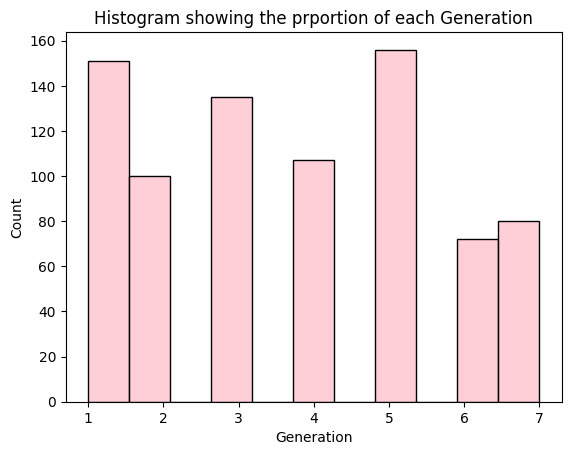

In [45]:
sns.histplot(df['Generation'], color='pink')
plt.title('Histogram showing the prportion of each Generation')
plt.show()

In [43]:
# proportion of True and False in df['Legendary']
group_by_legendary = df.groupby('Legendary')['Name'].agg('count')
group_by_legendary

Legendary
0    748
1     53
Name: Name, dtype: int64

In [33]:
# Let's transform Legendary
# Encode the last column to bear 1 for true and 0 for false
categorical_feature = df['Legendary']
from sklearn.preprocessing import LabelEncoder
ohe = LabelEncoder()
df['Legendary'] = df['Legendary'].values
df['Legendary'] = ohe.fit_transform(categorical_feature)

In [34]:
df.tail()

,Name,percentage_male,Attack,Defense,Speed,Type1,Type2,Weight,Generation,Legendary
796,Celesteela,55.155761,107,101,61,steel,flying,999.9,7,1
797,Kartana,55.155761,59,31,109,grass,steel,0.1,7,1
798,Guzzlord,55.155761,97,53,43,dark,dragon,888.0,7,1
799,Necrozma,55.155761,127,89,79,psychic,flying,230.0,7,1
800,Magearna,55.155761,130,115,65,steel,fairy,80.5,7,1


In [35]:
# values in 'weight' and other features have extreme difference betwween them, let's normalize the numerical feature
from sklearn.preprocessing import StandardScaler

features = df[['percentage_male', 'Attack', 'Defense', 'Speed', 'Weight', 'Generation', 'Legendary']]
ss = StandardScaler()
ss.fit_transform(features)

array([[ 1.73681259e+00, -1.95025081e-01, -2.11686641e-01, ...,
        -5.04839391e-01, -1.39455066e+00, -2.66187180e-01],
       [ 1.73681259e+00,  2.68888273e-01,  3.25465416e-01, ...,
        -4.48311722e-01, -1.39455066e+00, -2.66187180e-01],
       [ 1.73681259e+00,  1.56784566e+00,  1.75787090e+00, ...,
         3.57902573e-01, -1.39455066e+00, -2.66187180e-01],
       ...,
       [-3.74596472e-16,  7.94656740e-01, -6.41408286e-01, ...,
         7.66016538e+00,  1.71552381e+00,  3.75675492e+00],
       [-3.74596472e-16,  1.72248345e+00,  6.47756649e-01, ...,
         1.56259060e+00,  1.71552381e+00,  3.75675492e+00],
       [-3.74596472e-16,  1.81526612e+00,  1.57882021e+00, ...,
         1.77199369e-01,  1.71552381e+00,  3.75675492e+00]])

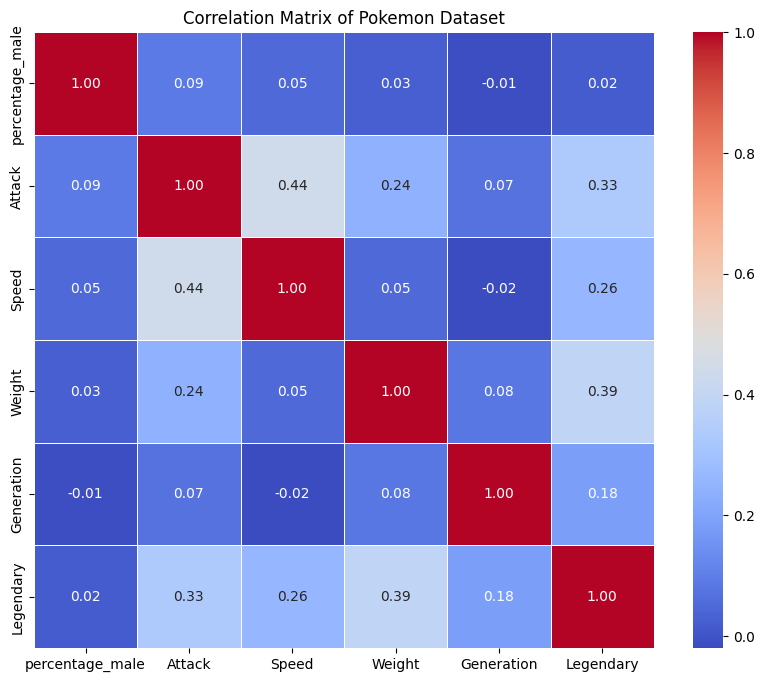

In [37]:
correlation_matrix = df[['percentage_male', 'Attack', 'Speed',
                         'Weight', 'Generation', 'Legendary']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Pokemon Dataset')
plt.show()

Perfect! Features are mutually independent